In [54]:
# autoreload
%load_ext autoreload
%autoreload 2

import scTRS.method_simple as simple_md
import scTRS.util as util
import scTRS.method as md
import scTRS.data_loader as dl
import submitit
import numpy as np
from anndata import read_h5ad
from statsmodels.stats.multitest import multipletests

import pandas as pd
import os
from os.path import join
import itertools
import pickle
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt

# constants
DATA_PATH = '/n/holystore01/LABS/price_lab/Users/mjzhang/scTRS_data'
SCORE_FILE_DIR = join(DATA_PATH, "score_file")

TRAIT_LIST = ['PASS_Schizophrenia_Ruderfer2018',
              'PASS_BipolarDisorder_Ruderfer2018',
              'PASS_Alzheimers_Jansen2019', 
              'PASS_AdultOnsetAsthma_Ferreira2019',
              'PASS_Coronary_Artery_Disease', 
              'PASS_LargeArteryStroke_Malik2018', 
              'PASS_HDL', 'PASS_LDL',
              'PASS_Rheumatoid_Arthritis', 'PASS_Lupus', 
              'PASS_FastingGlucose_Manning',
              'PASS_IBD_deLange2017', 
              'PASS_Type_1_Diabetes', 
              'PASS_Type_2_Diabetes']

SCORE_ADATA = read_h5ad("/n/holystore01/LABS/price_lab/Users/mjzhang/scTRS_data/tabula_muris_senis/tabula-muris-senis-facs-official-raw-obj.h5ad")


In [69]:
result_dir = join(SCORE_FILE_DIR, "score.facs.gwas_max_abs_z.top500")
result_dict = {}
for trait in TRAIT_LIST:
    result_dict[trait] = pd.read_csv(join(result_dir, f"{trait}.score.gz"), sep='\t')
# add random traits result
result_dir = join(SCORE_FILE_DIR, "score.facs.all_size500.weight_1en2")
for rep_i in range(5):
    result_dict[f"random_{rep_i}"] = pd.read_csv(join(result_dir, f"all_size500_rep{rep_i}.score.gz"), sep='\t')

/n/home12/khou/scTRS/experiments/job.gene_score_benchmark/out/score_file/score.facs.gwas_maxabsz.top500


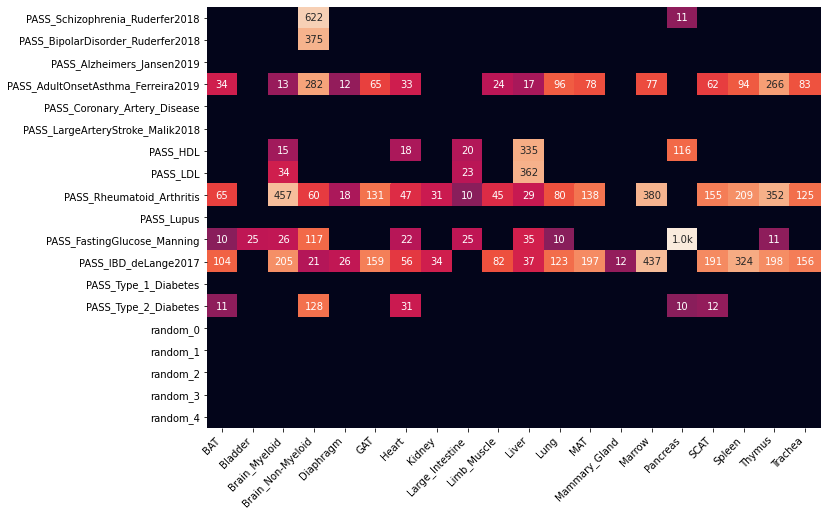

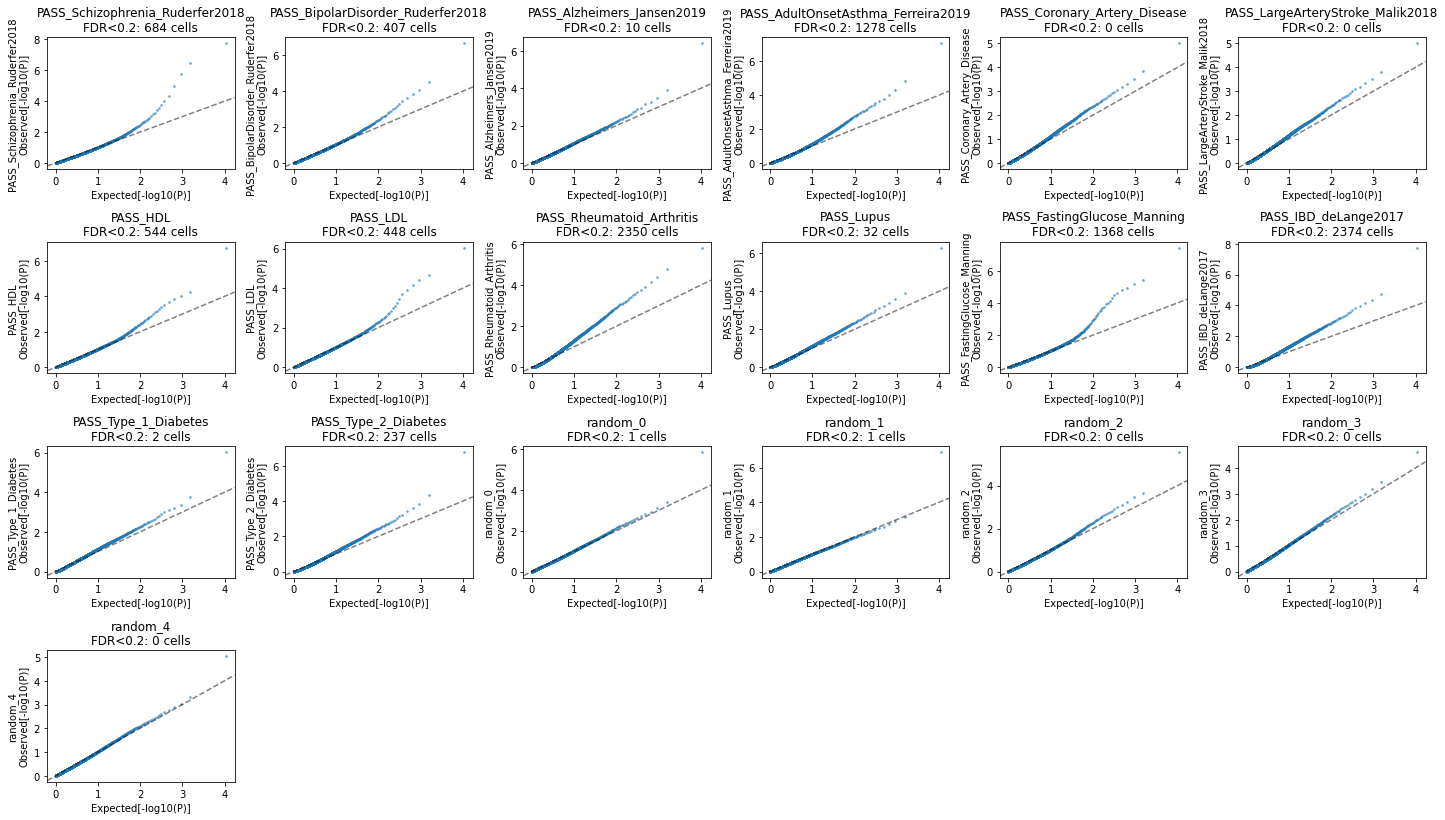

In [67]:
meta_df = SCORE_ADATA.obs.copy()
pval_dict = {trait: result_dict[trait].pval.values for trait in result_dict}
pval_index = result_dict[trait]['index'].values
util.plot_assoc_matrix(pval_dict, pval_index, meta_df, "tissue")
util.plot_qq(pval_dict, num_cols=6)

# TODO:
- [ ] does data smoothing work? (knn aggregation) see RNA velocity